# 1. Importing Required Libraries
# We first import essential libraries for data handling, visualization, and modeling.

In [72]:
import pandas as pd
import numpy as np 
import sklearn as sk 
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier


# 2. Loading the Dataset
# Load the Titanic dataset into a pandas DataFrame.

In [73]:
df = pd.read_csv("tested.csv")

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Exploratory Data Analysis (EDA)
# Check basic information about the dataset.

In [75]:
df.shape

(418, 12)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [77]:
# Checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [78]:
# Droping unnecessary  columns
df.drop(columns= ['Cabin','Name','PassengerId','Ticket'], inplace = True)

In [79]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


#  4. Handling Missing Values

In [80]:
# Filling missing values in 'Age' column with mean value.
df['Age'].fillna(df['Age'].mean(), inplace = True)

C:\Users\saroh\AppData\Local\Temp\ipykernel_11764\3423336041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [81]:
print(df['Fare'].mode())


0    7.75
Name: Fare, dtype: float64


In [82]:
# Filling missing values in 'Fare' column with its mode value.
df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)


C:\Users\saroh\AppData\Local\Temp\ipykernel_11764\4147293475.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)


In [83]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [84]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Data analysis

In [85]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [86]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [87]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

#  5. Visualization


In [88]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

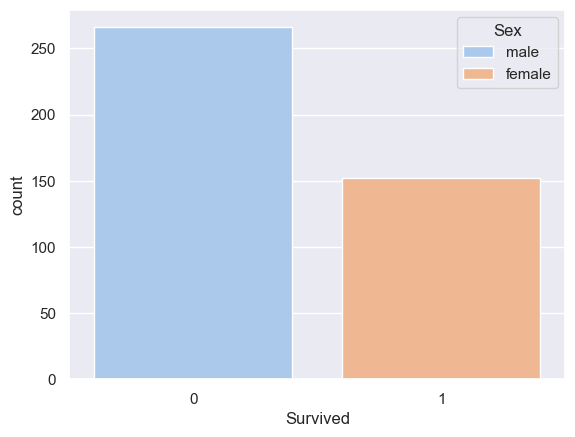

In [89]:
sns.countplot(x='Survived', hue='Sex', data=df, palette='pastel')


<Axes: xlabel='Age', ylabel='Count'>

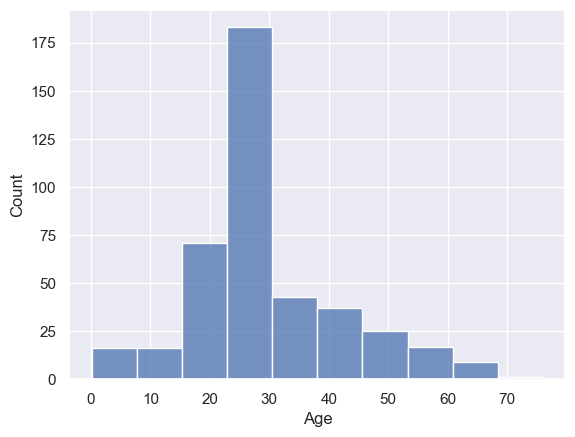

In [90]:
sns.histplot(df['Age'], bins=10)


<Axes: xlabel='Pclass', ylabel='count'>

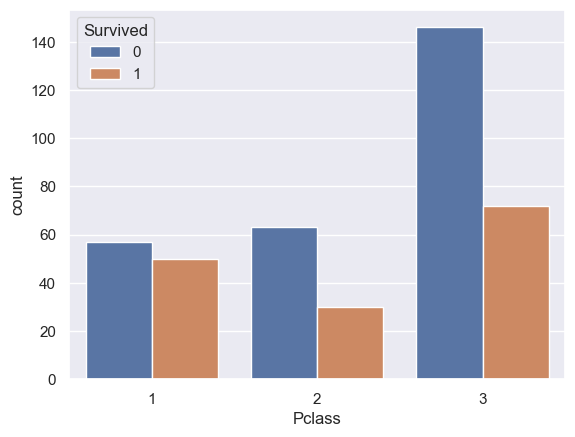

In [91]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)

<Axes: xlabel='Embarked', ylabel='count'>

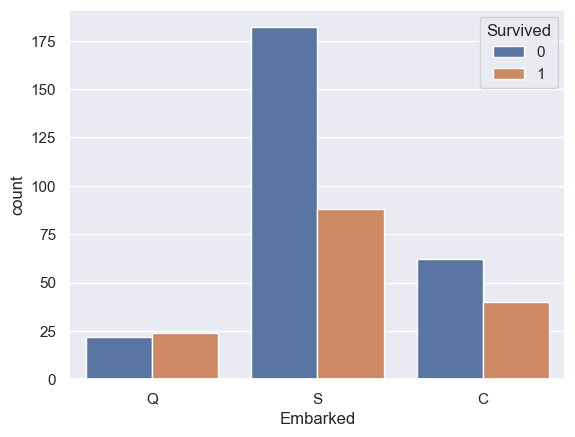

In [92]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = df)

# 6. Encoding Categorical Features
# Using manual mapping for 'Sex' and 'Embarked'

Categorical to numeric 

In [93]:
# df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


C:\Users\saroh\AppData\Local\Temp\ipykernel_11764\972160667.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [95]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,0.452723,0,0,0.015282,2
1,1,3,1,0.617566,1,0,0.013663,0
2,0,2,0,0.815377,0,0,0.018909,2
3,0,3,0,0.353818,0,0,0.016908,0
4,1,3,1,0.287881,1,1,0.023984,0


# 7. Preparing Features and Target Variable
# Splitting the data into independent features (X) and target (Y).

In [96]:
X = df.drop(['Survived'], axis = 1)
Y = df['Survived']

# 8. Splitting the Dataset
# Splitting the dataset into training and testing sets (80%-20%).

In [97]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

# 9. Building the Model
# Using Logistic Regression for classification.

In [98]:
## Logestic regression 
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

# 10. Model Evaluation
# Predicting on the test set and evaluating the model.

In [99]:
y_pred = model.predict(X_test)


In [100]:
# Accuracy
print("Accuracy:", accuracy_score(Y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

# Detailed Report (Precision, Recall, F1 Score)
print("Classification Report:\n", classification_report(Y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [101]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)


DecisionTreeClassifier()

In [102]:
y_pred = model.predict(X_test)

In [103]:
# Accuracy
print("Accuracy:", accuracy_score(Y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

# Detailed Report (Precision, Recall, F1 Score)
print("Classification Report:\n", classification_report(Y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

